In [1]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [2]:
ls

flowers/  Flowers-Dataset.zip


In [3]:
pwd

'/content/drive/MyDrive/CNN'

In [5]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import splitfolders

In [8]:
input_folder = "/content/drive/MyDrive/CNN/flowers"

In [11]:
splitfolders.ratio(input_folder, output = "/content/drive/MyDrive/CNN/dataset",
                   seed=42, ratio = (.7,.1,.2), group_prefix = None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.40 files/s]
Copying files: 7 files [00:00, 25.71 files/s]
Copying files: 16 files [00:00, 47.29 files/s]
Copying files: 25 files [00:00, 56.76 files/s]
Copying files: 35 files [00:00, 68.12 files/s]
Copying files: 43 files [00:00, 68.12 files/s]
Copying files: 52 files [00:00, 72.45 files/s]
Copying files: 61 files [00:01, 71.69 files/s]
Copying files: 70 files [00:01, 76.24 files/s]
Copying files: 78 files [00:01, 72.81 files/s]
Copying files: 88 files [00:01, 79.09 files/s]
Copying files: 97 files [00:01, 76.01 files/s]
Copying files: 106 files [00:01, 79.22 files/s]
Copying files: 115 files [00:01, 79.28 files/s]
Copying files: 124 files [00:01, 78.52 files/s]
Copying files: 132 files [00:01, 72.74 files/s]
Copying files: 141 files [00:02, 75.77 files/s]
Copying files: 149 files [00:02, 71.82 files/s]
Copying files: 157 files [00:02, 73.53 files/s]
Copying files: 165 files [00:02, 68.95 files/s]
Copying fil

In [12]:
#data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip= True,vertical_flip= True,zoom_range = 0.2)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
#loading training and testing data
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/dataset/train",target_size=(64,64),
                                            class_mode="categorical",batch_size=24)

Found 3019 images belonging to 5 classes.


In [21]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/dataset/test",
                                          target_size=(64,64),class_mode="categorical",batch_size=24)

Found 868 images belonging to 5 classes.


In [35]:
x_valid = test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/dataset/val",
                                           target_size=(64,64),class_mode="categorical",batch_size=24)

Found 430 images belonging to 5 classes.


In [22]:
#Building a Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [23]:
model = Sequential()

In [24]:
#convolution layer
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape=(64,64,3)))

In [25]:
#maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

In [26]:
#flatten layer
model.add(Flatten())

In [27]:
#dense-hidden layer
model.add(Dense(300, activation = "relu"))

In [28]:
model.add(Dense(300, activation = "relu"))

In [29]:
#output layer
model.add(Dense(5, activation = "softmax"))

In [30]:
#Compiling the model

model.compile(loss = "categorical_crossentropy", metrics =["accuracy"], optimizer ='adam')

In [31]:
len(x_train)

126

In [36]:
model.fit(x_train,epochs = 5, validation_data=x_valid, steps_per_epoch=len(x_train), validation_steps=len(x_valid))

Epoch 1/5
126/126 [==============================] - 37s 289ms/step - loss: 1.3447 - accuracy: 0.4455 - val_loss: 1.4870 - val_accuracy: 0.4000
Epoch 2/5
126/126 [==============================] - 34s 267ms/step - loss: 1.0842 - accuracy: 0.5724 - val_loss: 1.2919 - val_accuracy: 0.5140
Epoch 3/5
126/126 [==============================] - 34s 266ms/step - loss: 1.0260 - accuracy: 0.6028 - val_loss: 1.1232 - val_accuracy: 0.5535
Epoch 4/5
126/126 [==============================] - 34s 269ms/step - loss: 0.9645 - accuracy: 0.6277 - val_loss: 1.1341 - val_accuracy: 0.5791
Epoch 5/5
126/126 [==============================] - 34s 272ms/step - loss: 0.9207 - accuracy: 0.6482 - val_loss: 1.2193 - val_accuracy: 0.5674


In [37]:
model.save("flower.h5")

In [38]:
#testing the model

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [39]:
#load the model

model = load_model("/content/drive/MyDrive/CNN/flower.h5")

In [40]:
#load the image
img = image.load_img("/content/drive/MyDrive/CNN/dataset/train/sunflower/1022552002_2b93faf9e7_n.jpg",target_size=(64,64))

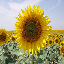

In [41]:
img

In [42]:
x = image.img_to_array(img)

In [43]:
x

array([[[197., 207., 234.],
        [191., 202., 230.],
        [194., 206., 232.],
        ...,
        [165., 182., 212.],
        [159., 182., 216.],
        [154., 174., 207.]],

       [[197., 205., 228.],
        [200., 206., 232.],
        [203., 211., 234.],
        ...,
        [159., 179., 212.],
        [160., 177., 207.],
        [168., 185., 215.]],

       [[206., 212., 234.],
        [205., 211., 233.],
        [207., 214., 233.],
        ...,
        [181., 190., 221.],
        [164., 180., 214.],
        [161., 180., 213.]],

       ...,

       [[ 89.,  96.,  65.],
        [131., 134., 103.],
        [124., 139., 110.],
        ...,
        [127., 147., 110.],
        [154., 170., 134.],
        [163., 178., 149.]],

       [[112., 123.,  91.],
        [152., 155., 128.],
        [ 98.,  99.,  67.],
        ...,
        [126., 143., 111.],
        [151., 164., 136.],
        [143., 156., 128.]],

       [[114., 140., 105.],
        [ 60.,  85.,  53.],
        [132., 1

In [44]:
#expand dimension

x= np.expand_dims(x,axis=0)

In [45]:
x.ndim

4

In [46]:
pred = model.predict(x)

1/1 [==============================] - 0s 119ms/step


In [47]:
labels = ["daisy","dandelion","rose","sunflower","tulip"]

In [48]:
labels[np.argmax(pred)]

'sunflower'